### This notebook should be run in the same directory that contains patient folders.
### Example: 
- ecog_data_analysis *(folder)*
    - ecogtools_demo *(jupter notebook)*
    - patient_2002 *(folder)*
        - edf file *(edf)*
        - merged trigger *(csv)*
        - behavioral_data_2002 *(folder)*
            - ToM_Loc_2002.json
 
### Image files will be saved in new folder in patient folder (ex. patient_2002)

In [1]:
from __future__ import print_function

import numpy as np
from numpy.fft import fft, ifft

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import json
import os

import mne
from mne.time_frequency import tfr_morlet, psd_multitaper

import ecogtools

In [2]:
%matplotlib inline

# ToM_Loc Task

In [3]:
# Define variables
patient_num = "2002"

taskname = "ToM_Loc"

event_names = ['quest_start', 'story_start', 'time_of_resp']

event_id = {'b/story_start': 1, 'b/quest_start': 4, 'b/time_of_resp': 16,
            'p/story_start': 2, 'p/quest_start': 5, 'p/time_of_resp': 17}

In [4]:
data = ecogtools.Data(patient_num, taskname, event_names, event_id)

Extracting edf Parameters from patient_2002/john_2002.edf...
Setting channel info structure...
Creating Raw.info structure...
Ready.


In [5]:
channels_of_interest = ['RTG31']
data.initialize_epochs_object(channels_of_interest)

60 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 60 events and 12001 original time points ...
0 bad epochs dropped


In [6]:
evoked_belief = data.create_evoked("b/quest_start")
evoked_photo = data.create_evoked("p/quest_start")

In [7]:
evoked_combined = mne.combine_evoked(data.evoked_list, weights=[1, -1])

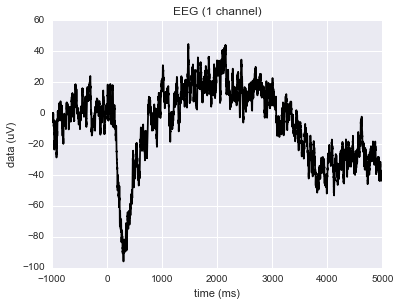

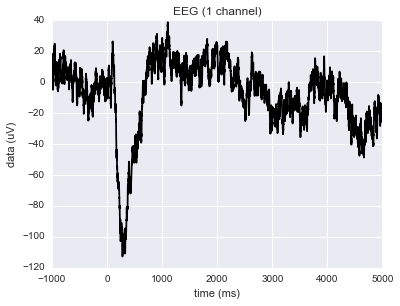

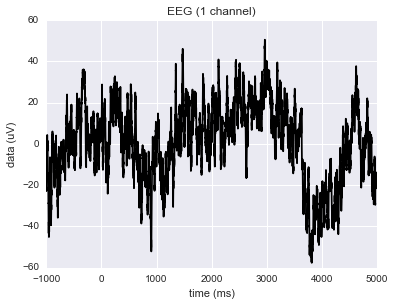

In [8]:
evoked_belief.plot()
evoked_photo.plot()
evoked_combined.plot();

In [9]:
freqs = np.arange(2, 100, 5)
n_cycles = freqs/2.

In [10]:
power1, itc1 = data.compute_power('b/quest_start', freqs, n_cycles)

In [11]:
power2, itc2 = data.compute_power('p/quest_start', freqs, n_cycles)

Applying baseline correction (mode: ratio)


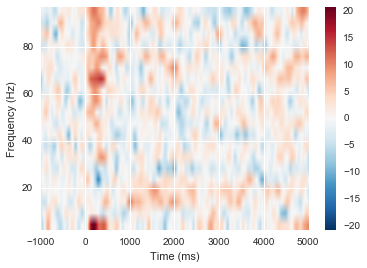

In [12]:
power1.plot([0], baseline=(-1., 0), mode="ratio", dB=True);

Applying baseline correction (mode: ratio)


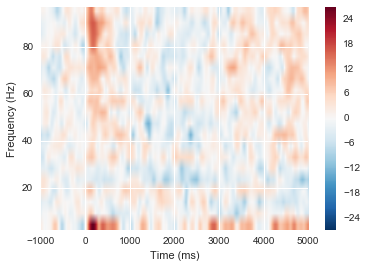

In [13]:
power2.plot([0], baseline=(-1., 0), mode="ratio", dB=True);

In [14]:
combined = data.compute_diff_power(power1, power2)

No baseline correction applied


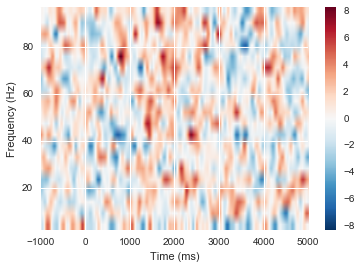

In [15]:
combined.plot([0]);

Applying baseline correction (mode: ratio)


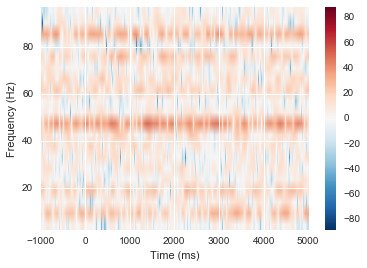

In [16]:
combined.plot([0], baseline=(-1., 0), mode="ratio", dB=True);

# TOM 2010 TASK

In [17]:
# Define variables
patient_num = "2002"

taskname = "ToM_2010"

event_names = ['quest_start', 'story_start', 'time_of_response']

event_id = {'story_start': 1, 'time_of_resp': 16, 
            'mental/expected/quest_start': 4,
            'mental/unexpected/quest_start': 5,
            'physical/expected/quest_start': 6,
            'physical/unexpected/quest_start':7 }

In [18]:
data = ecogtools.Data(patient_num, taskname, event_names, event_id)

Extracting edf Parameters from patient_2002/john_2002.edf...
Setting channel info structure...
Creating Raw.info structure...
Ready.


In [19]:
channels_of_interest = ['RTG31']
data.initialize_epochs_object(channels_of_interest)

81 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 81 events and 12001 original time points ...
0 bad epochs dropped


In [20]:
evoked_mental = data.create_evoked("mental/quest_start")
evoked_physical = data.create_evoked("physical/quest_start")

In [21]:
evoked_comb_tom = mne.combine_evoked(data.evoked_list, weights=[1, -1])

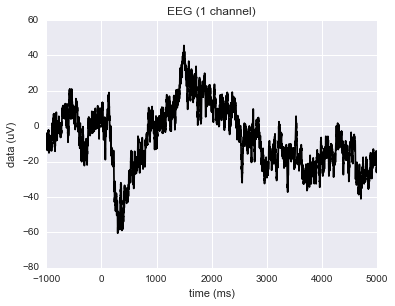

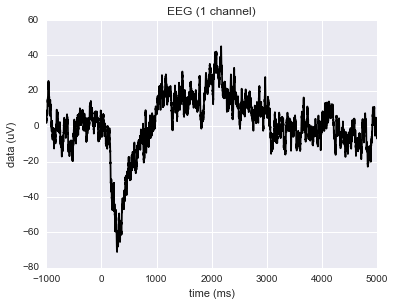

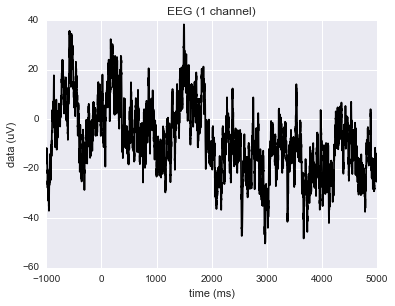

In [22]:
evoked_mental.plot()
evoked_physical.plot()
evoked_comb_tom.plot();

In [23]:
evoked_expected = data.create_evoked("expected/quest_start")
evoked_unexpected = data.create_evoked("unexpected/quest_start")

In [24]:
evoked_comb_attn = mne.combine_evoked(data.evoked_list[2:], weights=[1, -1])

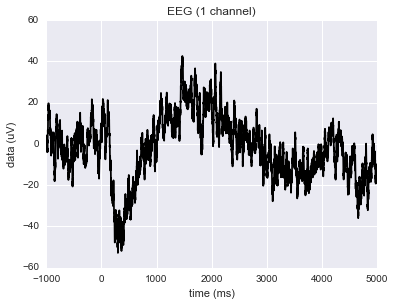

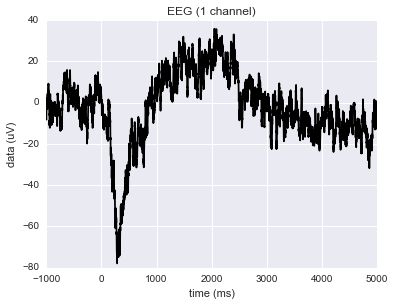

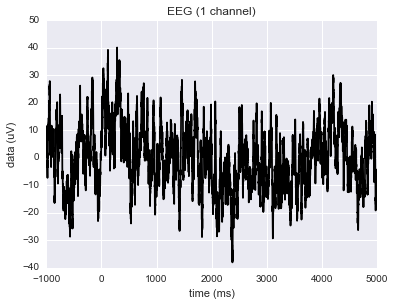

In [25]:
evoked_expected.plot()
evoked_unexpected.plot()
evoked_comb_attn.plot();

In [26]:
freqs = np.arange(2, 100, 5)
n_cycles = freqs/2.

In [27]:
power1, itc1 = data.compute_power('mental/quest_start', freqs, n_cycles)

In [28]:
power2, itc2 = data.compute_power('physical/quest_start', freqs, n_cycles)

In [29]:
power3, itc3 = data.compute_power('expected/quest_start', freqs, n_cycles)

In [30]:
power4, itc4 = data.compute_power('unexpected/quest_start', freqs, n_cycles)

Applying baseline correction (mode: ratio)


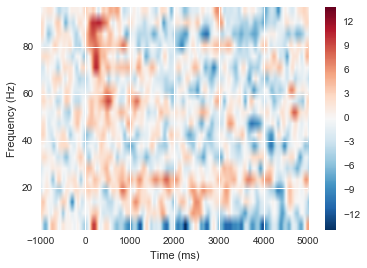

In [31]:
power1.plot([0], baseline=(-1., 0), mode="ratio", dB=True);

Applying baseline correction (mode: ratio)


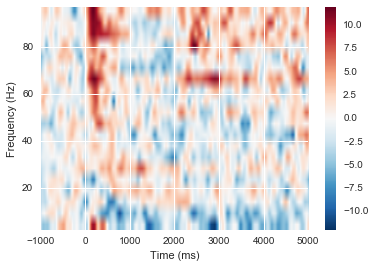

In [32]:
power2.plot([0], baseline=(-1., 0), mode="ratio", dB=True);

Applying baseline correction (mode: ratio)


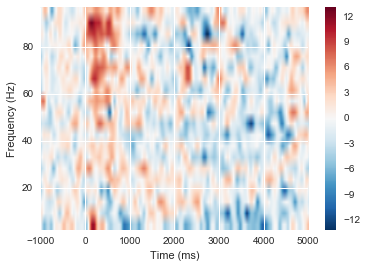

In [33]:
power3.plot([0], baseline=(-1., 0), mode="ratio", dB=True);

Applying baseline correction (mode: ratio)


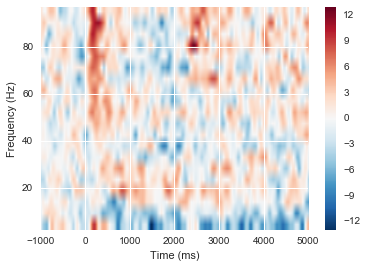

In [34]:
power4.plot([0], baseline=(-1., 0), mode="ratio", dB=True);

In [35]:
combined1 = data.compute_diff_power(power1, power2)

In [36]:
combined2 = data.compute_diff_power(power3, power4)

### Mental - physical

No baseline correction applied


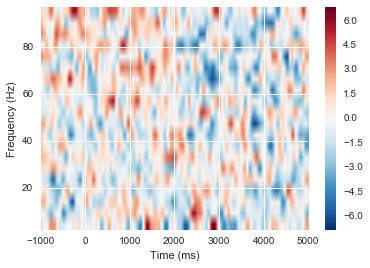

In [37]:
combined1.plot([0]);

Applying baseline correction (mode: ratio)


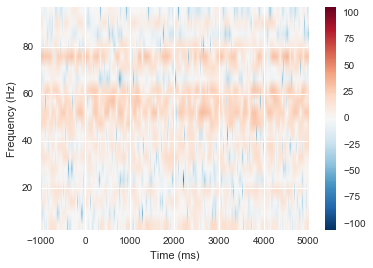

In [38]:
combined1.plot([0], baseline=(-1., 0), mode="ratio", dB=True);

### Expected - unexpected

No baseline correction applied


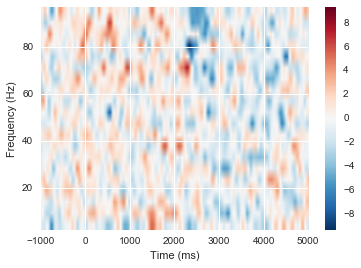

In [39]:
combined2.plot([0]);

Applying baseline correction (mode: ratio)


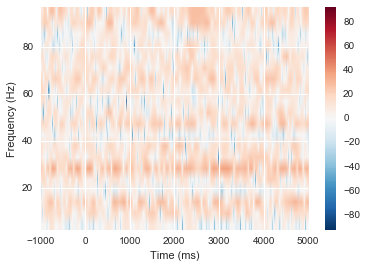

In [40]:
combined2.plot([0], baseline=(-1., 0), mode="ratio", dB=True);

# Other Tasks

In [41]:
# Define variables
patient_num = "2002"

taskname = "Bio_Motion"

event_names = ['quest_start', 'story_start', 'time_of_resp']

event_id = {'b/story_start': 1, 'b/quest_start': 4, 'b/time_of_resp': 16,
            'p/story_start': 2, 'p/quest_start': 5, 'p/time_of_resp': 17}

In [42]:
data = ecogtools.Data(patient_num, taskname, event_names, event_id)

You haven't set up other tasks yet.
